## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import (classification_report, recall_score, precision_score, accuracy_score)

In [125]:
#Read your data set
df_raw = pd.read_csv('titanic.csv')

#Exploratory analysis - put the data in a data frame
df_raw = pd.DataFrame(df_raw)

#Understand your data set by printing all the columns
pd.set_option('display.max_columns', None)

#Print first 5 rows and all the columns
print(df_raw.shape) #There are 1300+ rows in the Dataset, therefore, suffienct for the Final Project
                #Have a large enough dataset
print(df_raw.head())

#Perfect

(1310, 14)
   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0             

In [126]:
#Only include columns you need
#Data Wrangling in-process

df_raw1 = df_raw[["pclass","survived","sex","age", "embarked","sibsp","parch"]]

#Combine sibsp and parch under "family"
#Sibsp means you had siblings and spouses on-board
#parch means the numer of parents / children on board

df_raw1["family"] = df_raw1["sibsp"] + df_raw1["parch"]

#Now delete the sibsp and parch columns for clarity
df = df_raw1[["pclass","survived","sex","age", "embarked","family"]]

print(df.head())

#Perfect

   pclass  survived     sex      age embarked  family
0     1.0       1.0  female  29.0000        S     0.0
1     1.0       1.0    male   0.9167        S     3.0
2     1.0       0.0  female   2.0000        S     3.0
3     1.0       0.0    male  30.0000        S     3.0
4     1.0       0.0  female  25.0000        S     3.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [127]:
#Find and then fill in the missing values of your data set
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   embarked  1307 non-null   object 
 5   family    1309 non-null   float64
dtypes: float64(4), object(2)
memory usage: 61.5+ KB
None


In [128]:
#Data Wrangling in-process


#Find the mean of the data points, you can use this to fill in missing values
print(df["age"].mean())

#Update age with the average, I got a 29.8 from the above calculation
df.update(df[['age']].fillna(29.8))


df.update(df[['sex']].fillna('male')) #Far more males than females on titanic
df.update(df[['pclass']].fillna(3)) #Class 3 had the most number of people, more than class one and two combined 
df.update(df[['survived']].fillna(0)) #More likely they did not survive, therefore, 0
df.update(df[['embarked']].fillna('S')) #Most embarked from Southhampton, therefore, use S
df.update(df[['family']].fillna(0)) #Most did not have family, so use 0

#Check is all values are now filled
print(df.info())

print(df.describe())
#Perfect, we now have 1310 rows for all columns

29.8811345124283
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1310 non-null   float64
 1   survived  1310 non-null   float64
 2   sex       1310 non-null   object 
 3   age       1310 non-null   float64
 4   embarked  1310 non-null   object 
 5   family    1310 non-null   float64
dtypes: float64(4), object(2)
memory usage: 61.5+ KB
None
            pclass     survived          age       family
count  1310.000000  1310.000000  1310.000000  1310.000000
mean      2.295420     0.381679    29.864784     0.883206
std       0.837742     0.485984    12.878318     1.583222
min       1.000000     0.000000     0.166700     0.000000
25%       2.000000     0.000000    22.000000     0.000000
50%       3.000000     0.000000    29.800000     0.000000
75%       3.000000     1.000000    35.000000     1.000000
max       3.000000     1.000000    80.00000

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:6397: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [129]:
3. #Below I will explore the data to see which model to use

#From reading the data set, there are 3 assumptions:
#1.Women are more likely to survive
#2.Higher class passengers (pclass) were more likely to survive 
#3.Young children (age) were more likely to survive

#I would like to confirm these assumptions by doing a percentage
#These are going to help me set my benchmarks later on

df_sex = df[['sex',"survived"]]
df_sex = df_sex.groupby(['sex']) #Groupby to group all the men and women together
print(df_sex.mean())
#Assumption 1 is correct
#Women have a 72% survival rate but men only had a 19% surival

df_class = df[['pclass',"survived"]]
df_class = df_class.groupby(['pclass']) #Groupby to group all people of the same class together
print(df_class.mean())
#Assumption 2 is correct
#People of a higher class are more likely to survive

#To analyze age, I am form a correlation matric
#To see how to group by the individuals
df_age = df[["age","survived"]]
print(df_age.corr())

#A -0.05 value tells us that there is a correlation between age and survival
#Therefore, this should be explored further 


        survived
sex             
female  0.727468
male    0.190758
        survived
pclass          
1.0     0.619195
2.0     0.429603
3.0     0.254930
               age  survived
age       1.000000 -0.049912
survived -0.049912  1.000000


In [130]:
#Below I will explore 'embarked' and 'family' to see if there is a correlation with survival

df_embarked = df[['embarked',"survived"]]
df_embarked = df_embarked.groupby(['embarked']) #Groupby to group all people of the same class together
print(df_embarked.mean())
#Individuals who got on in Charleston had the highest chance of surviving. 
#However, individuals in Q and S also had a 30% survival rate
#Therefore, the place the embarked on does not seem to have enough of a correlation for me to explore
#I might delte this column later on so that I do not over fit the model


df_family = df[['family',"survived"]]
df_family = df_family.groupby(['family']) #Groupby to group all the people who have family together
print(df_family.mean())
#This tells us that people with 1-3 family members on board had a higher survival rate than the average person, which was 30%
#But families with more than 4 people had a lower survival rate 



          survived
embarked          
C         0.555556
Q         0.357724
S         0.333697
        survived
family          
0.0     0.302149
1.0     0.536170
2.0     0.566038
3.0     0.697674
4.0     0.272727
5.0     0.200000
6.0     0.250000
7.0     0.000000
10.0    0.000000


In [131]:
#Model 1 - Logistic Regression
df1 = pd.get_dummies(df, columns=["pclass","sex","age", "embarked", "family"])
X = df1.iloc[:, 1:] 
y = df1.iloc[:, 0] #Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2020)

model = LogisticRegression()
model.fit(X_train, y_train)

predict_y = model.predict(X_test)

logistic_accuracy = metrics.accuracy_score(y_test, predict_y)
print(logistic_accuracy)


0.7862595419847328


[[205  38]
 [ 46 104]]


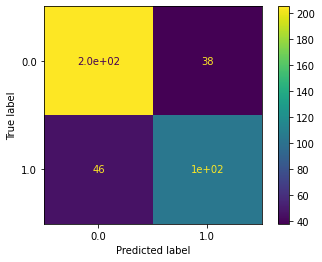

In [132]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predict_y)
print(cnf_matrix)
metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [133]:
dummy = DummyClassifier(strategy='most_frequent')
dummy = dummy.fit(X_train,y_train)
baseline_acc = dummy.score(X_test,y_test)

#To verify answer:
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.6183206106870229


In [134]:
#Model 2
bag = BaggingClassifier(random_state = 42)
bag = bag.fit(X_train, y_train)
bag_predict = bag.predict(X_test)
bag_accuracy = accuracy_score(y_test, bag_predict)

print(' Accuracy = ', bag_accuracy)

print('Classification Report:\n')
print(classification_report(y_test, bag_predict))

 Accuracy =  0.7659033078880407
Classification Report:

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       243
         1.0       0.72      0.63      0.67       150

    accuracy                           0.77       393
   macro avg       0.76      0.74      0.74       393
weighted avg       0.76      0.77      0.76       393



In [135]:
#Model 3 - Random Forest 
forest = RandomForestClassifier(n_estimators=10, max_features=7, random_state=42)
forest = forest.fit(X_train, y_train)
forest_predict = forest.predict(X_test)
forest_recall = recall_score(y_test, forest_predict)
forest_precision = precision_score(y_test, forest_predict)
print(forest_precision)

0.704225352112676


In [136]:
#Model 3 - Random Forest 2
forest2 = RandomForestClassifier(n_estimators=10, max_features=8, random_state=42)
forest2 = forest2.fit(X_train, y_train)
forest_predict2 = forest2.predict(X_test)
forest_recall = recall_score(y_test, forest_predict2)
forest_precision2 = precision_score(y_test, forest_predict2)
print(forest_precision2)

0.7164179104477612


In [137]:
#Feature Importance
important_features = forest.feature_importances_
features = X_train.columns
df2 = pd.DataFrame({'features': features, 'importance': important_features}).nlargest(3, columns=["importance"])
print(df2)


     features  importance
4    sex_male    0.190958
3  sex_female    0.086454
2  pclass_3.0    0.050738


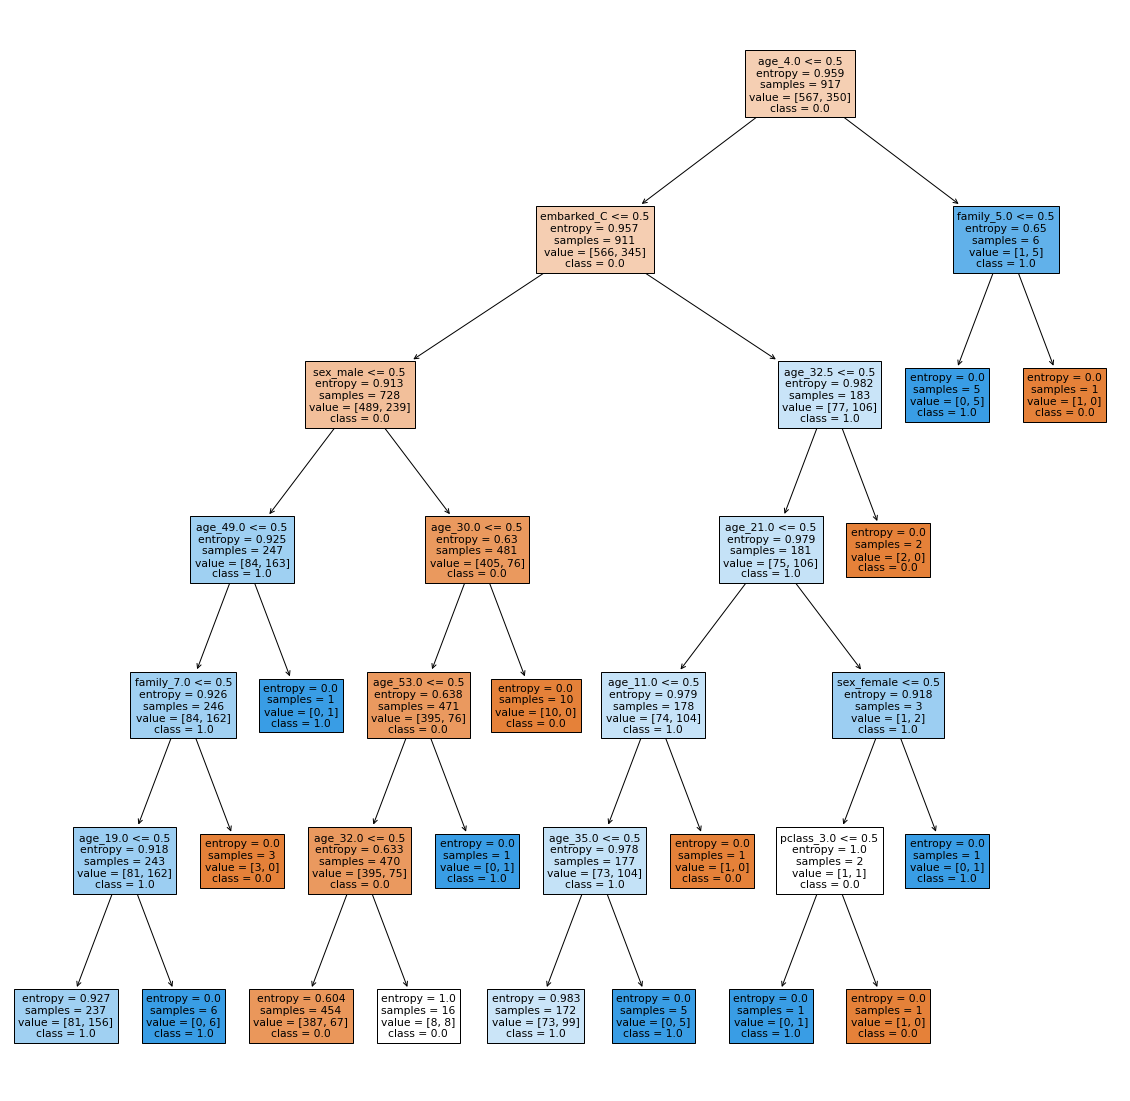

Accuracy on Training partition: 0.7502726281352236
Accuracy on Testing partition: 0.7175572519083969


In [138]:
#Model 4 - Decision Trees
dt = DecisionTreeClassifier(max_depth=6, criterion="entropy", random_state=2020, max_features=5)
dt.fit(X_train,y_train)
y_pred1 = dt.predict((X_test))

fn = X.columns

plt.figure(figsize=(20,20))
classList = list(map(str,dt.classes_.tolist()))
a = tree.plot_tree(dt, feature_names=fn, class_names=classList, filled=True)
plt.show()

training_pred = dt.predict(X_train)
acc_training = accuracy_score(training_pred, y_train)
print("Accuracy on Training partition:",acc_training)

acc_testing = accuracy_score(y_pred1, y_test)
print("Accuracy on Testing partition:",acc_testing)


In [139]:
#Decision Trees have the highest accuracy, therefore, I am exploring the parameters further
dt2 = DecisionTreeClassifier(max_depth=8, criterion="entropy", random_state=2020, max_features=5)
dt2.fit(X_train,y_train)
y_pred2 = dt2.predict((X_test))

training_pred2 = dt2.predict(X_train)
acc_training2 = accuracy_score(training_pred2, y_train)
print("Accuracy: Training partition:",acc_training2)

acc_testing2 = accuracy_score(y_pred2, y_test)
print("Accuracy: Testing partition:",acc_testing2)

#We have increased the accuracy of the training data and testing

Accuracy: Training partition: 0.8080697928026173
Accuracy: Testing partition: 0.7913486005089059


In [140]:
#Decision Trees have the highest accuracy, therefore, I am exploring the parameters further
dt3 = DecisionTreeClassifier(max_depth=8, criterion="entropy", random_state=2020, max_features=8)
dt3.fit(X_train,y_train)
y_pred3 = dt3.predict((X_test))

training_pred3 = dt3.predict(X_train)
acc_training3 = accuracy_score(training_pred3, y_train)
print("Accuracy: Training partition:",acc_training3)

acc_testing3 = accuracy_score(y_pred3, y_test)
print("Accuracy: Testing partition:",acc_testing3)

#1% more accuracy for increasing max features to 8

Accuracy: Training partition: 0.781897491821156
Accuracy: Testing partition: 0.8091603053435115


In [141]:
dt4 = DecisionTreeClassifier(max_depth=8, criterion="gini", random_state=2020, max_features=8)
dt4.fit(X_train,y_train)
y_pred4 = dt4.predict((X_test))

training_pred4 = dt4.predict(X_train)
acc_training4 = accuracy_score(training_pred4, y_train)
print("Accuracy: Training partition:",acc_training4)

acc_testing4 = accuracy_score(y_pred4, y_test)
print("Accuracy: Testing partition:",acc_testing4)

#Changing criterion to gini does not seem to make a difference

Accuracy: Training partition: 0.781897491821156
Accuracy: Testing partition: 0.8091603053435115


In [142]:
dt5 = DecisionTreeClassifier(max_depth=10, criterion="gini", random_state=2020, max_features=8)
dt5.fit(X_train,y_train)
y_pred5 = dt5.predict((X_test))

training_pred5 = dt5.predict(X_train)
acc_training5 = accuracy_score(training_pred5, y_train)
print("Accuracy: Training partition:",acc_training5)

acc_testing5 = accuracy_score(y_pred5, y_test)
print("Accuracy: Testing partition:",acc_testing5)

#Changing criterion to gini does not seem to make a difference

Accuracy: Training partition: 0.806979280261723
Accuracy: Testing partition: 0.806615776081425


Text(0.5, 0, 'Model Name')

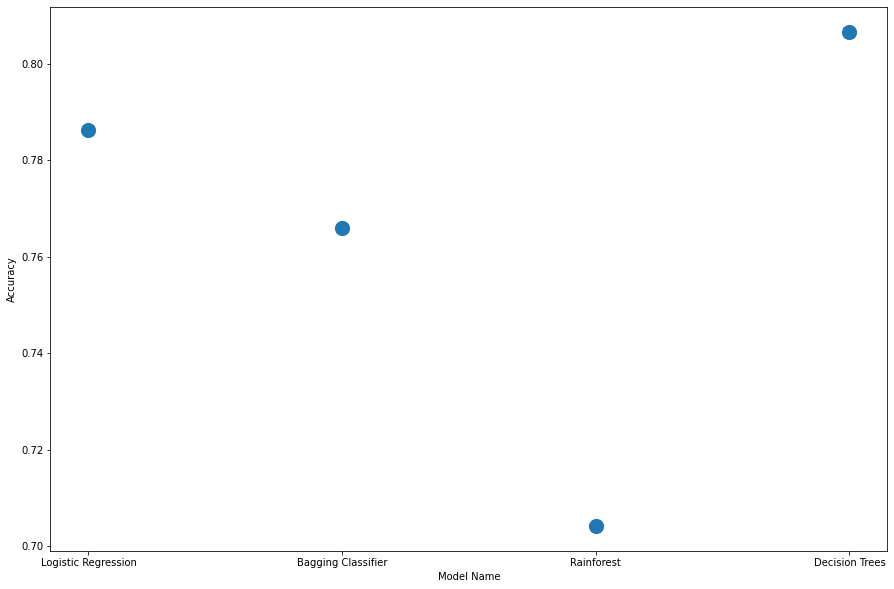

In [143]:
x_axis = ["Logistic Regression", "Bagging Classifier", "Rainforest", "Decision Trees"]
y_axis = [logistic_accuracy, bag_accuracy, forest_precision, acc_testing5]

plt.figure(figsize=(15,10))
plt.scatter(x_axis, y_axis, s=200)
plt.ylabel("Accuracy")
plt.xlabel("Model Name")

In [144]:
#Write up - Medium https://sigs36.medium.com/

#Thank you for all your help throughout the semester TAs! 